# **프로젝트 목표: 다음 분기에 어떤 게임을 설계해야 할까**



### ***1. 데이터 확인***

*   Name : 게임의 이름입니다.
*   Platform : 게임이 지원되는 플랫폼의 이름입니다.
*   Year : 게임이 출시된 연도입니다.
*   Genre : 게임의 장르입니다.
*   Publisher : 게임을 제작한 회사입니다.
*   NA_Sales : 북미지역에서의 출고량입니다.
*   EU_Sales : 유럽지역에서의 출고량입니다.
*   JP_Sales : 일본지역에서의 출고량입니다.
*   Other_Sales : 기타지역에서의 출고량입니다.





In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/vgames2.csv', encoding = 'utf-8')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### ***2. 데이터 전처리***

In [ ]:
#결측값 확인
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
#Year, Genre, Publisher에서 결측값이 존재하는 것은 불명확한 결과를 초래할 수 있으므로 이에 해당하는 행 삭제
df = df.dropna(axis=0)
#Unnamed: 0 칼럼삭제
df = df.drop(df.columns[0], axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
#단위 삭제
drop_values = ['K','M']
df = df[~df['NA_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['EU_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['JP_Sales'].str.contains('|'.join(drop_values))]
df = df[~df['Other_Sales'].str.contains('|'.join(drop_values))]

In [ ]:
#numeric 변환
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'])
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'])
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'])
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'])

In [ ]:
# year 컬럼을 19XX, 20XX으로 나타내자
def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### ***3. 데이터 시각화***

**3.1 지역에 따라서 선호하는 게임이 다를까**

**ANOVA 분석**

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('NA_Sales ~ C(Genre)', df).fit()
anova_lm(model)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,156.499529,14.227230,21.245807,1.604305e-43
Residual,15464.0,10355.449601,0.669649,NaN,NaN


***NA_Sales 장르별 출고량에 따른 ANOVA분석 : 1.604305e-43***

In [ ]:
model = ols('EU_Sales ~ C(Genre)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,38.665465,3.515042,13.616458,2.272014e-26
Residual,15464.0,3991.978912,0.258147,NaN,NaN


***EU_Sales 장르별 출고량에 따른 ANOVA분석 : 2.272014e-26***

In [ ]:
model = ols('JP_Sales ~ C(Genre)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,47.344643,4.304058,46.282334,1.914940e-100
Residual,15464.0,1438.085643,0.092996,NaN,NaN


***JP_Sales 장르별 출고량에 따른 ANOVA분석 : 1.914940e-100***

In [ ]:
model = ols('Other_Sales ~ C(Genre)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,4.777224,0.434293,11.795987,2.466429e-22
Residual,15464.0,569.338430,0.036817,NaN,NaN


***Other_Sales 장르별 출고량에 따른 ANOVA분석 : 2.466429e-22***



***p-value값이 0.05보다 작으므로 통계적으로 유의미한 차이가 있다.***

**3.1.1 지역에 따라서 선호하는 게임 장르가 다를까**

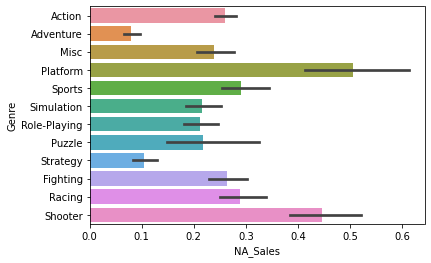

In [ ]:
#북미지역에서 선호하는 게임 장르
import seaborn as sns
sns.barplot(x = df['NA_Sales'], y = df['Genre'])

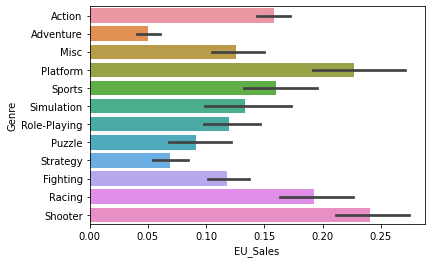

In [ ]:
#유럽지역에서 선호하는 게임 장르
sns.barplot(x = df['EU_Sales'], y = df['Genre'])

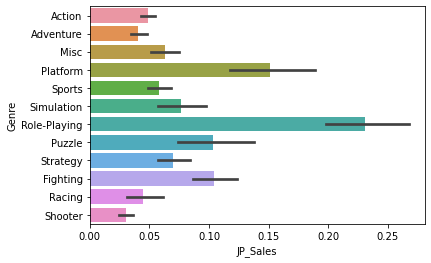

In [ ]:
#일본지역에서 선호하는 게임 장르
sns.barplot(x = df['JP_Sales'], y = df['Genre'])

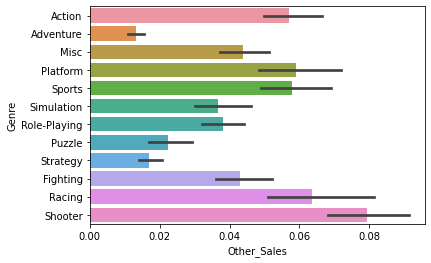

In [ ]:
#기타지역에서 선호하는 게임 장르
sns.barplot(x = df['Other_Sales'], y = df['Genre'])

***지역별 선호 장르***

* NA: platform, shooter순으로 선호

* EU: shooter, platform순으로 선호

* JP: Role-playing, platform순으로 선호

* Other: shooter, Racing순으로 선호

***따라서, 지역별로 선호하는 게임 장르가 다르다.***

**3.1.2 지역에 따라서 선호하는 게임 플랫폼이 다를까**

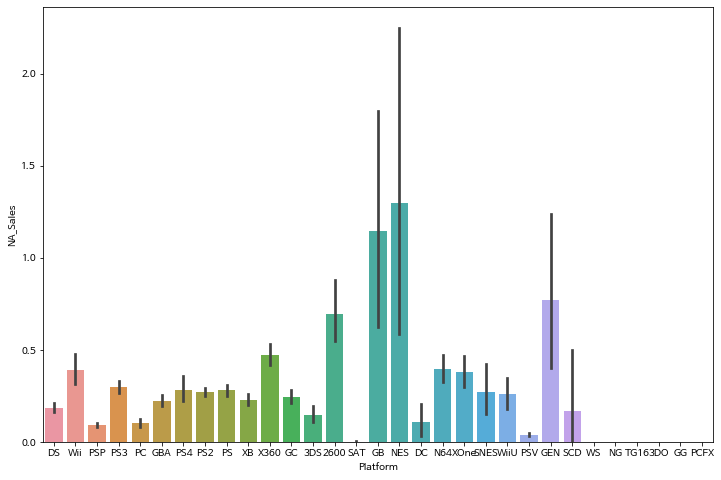

In [ ]:
#북미지역에서 선호하는 게임 플랫폼
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(12, 8))
sns.barplot(x = df['Platform'], y = df['NA_Sales'])

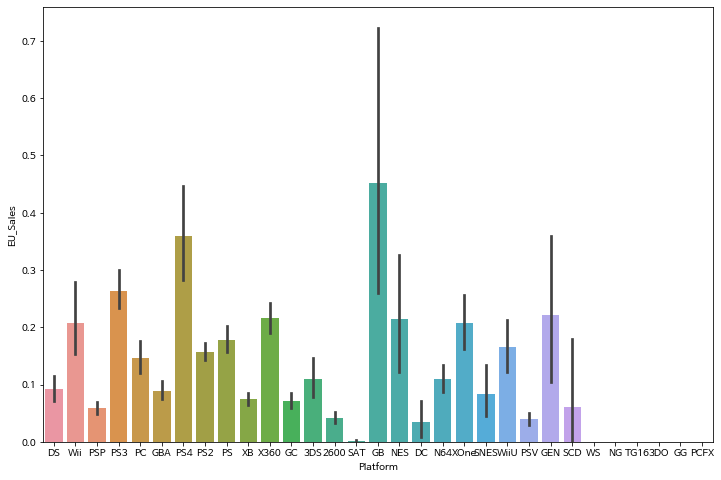

In [ ]:
#유럽지역에서 선호하는 게임 장르
plt.figure(figsize=(12, 8))
sns.barplot(x = df['Platform'], y = df['EU_Sales'])

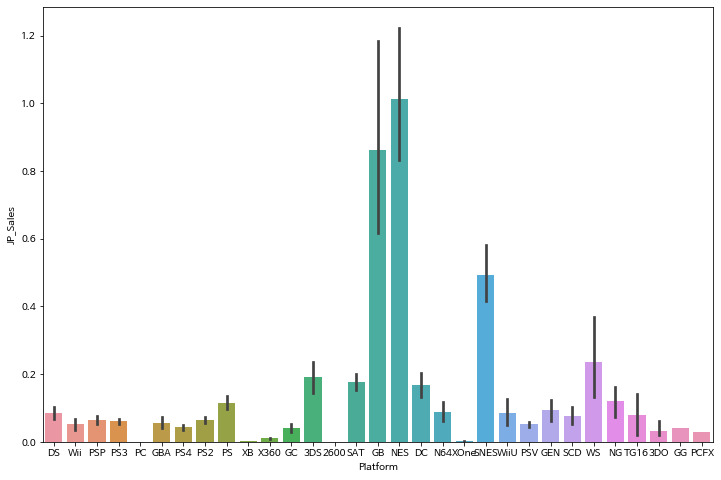

In [ ]:
#일본지역에서 선호하는 게임 장르
plt.figure(figsize=(12, 8))
sns.barplot(x = df['Platform'], y = df['JP_Sales'])

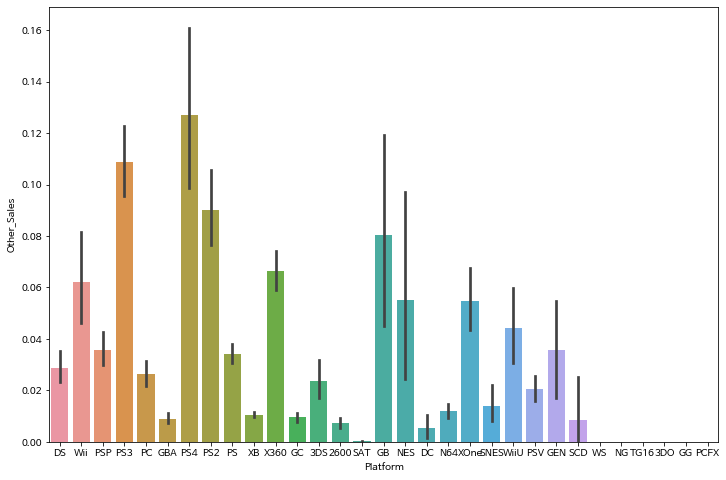

In [ ]:
#기타지역에서 선호하는 게임 장르
plt.figure(figsize=(12, 8))
sns.barplot(x = df['Platform'], y = df['Other_Sales'])

***지역별 선호 플랫폼***

* NA : 'NES' 플랫폼

* EU : 'GB' 플랫폼

* JP : 'NES'와 'GB' 플랫폼

* Other : 'PS' 플랫폼

***따라서, 지역마다 선호하는 플랫폼이 다르다.***

**3.2 연도별 게임의 트렌드가 있을까?**

**3.2.1 연도별 게임의 트렌드**

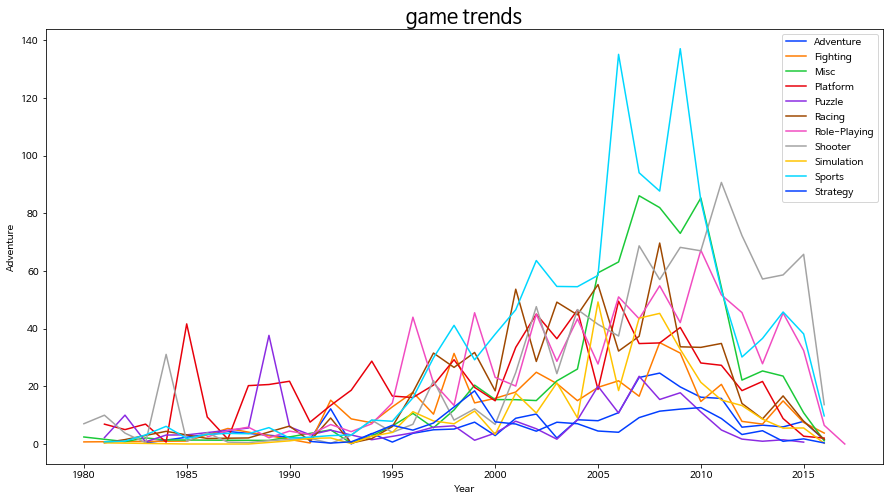

In [ ]:
#연도에 따른 게임 트렌드 파악1
df['Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df_genre_year = df.groupby(['Year', 'Genre'])['Sales'].sum().unstack()
sns.set_palette('bright')
color = ['']
plt.figure(figsize=(15, 8))
plt.title('game trends', fontsize=20)
genre = df_genre_year.columns
for i in range(1, len(genre)):
    sns.lineplot(data=df_genre_year, x='Year', y=genre[i], label=genre[i])

***출고량이 높은 장르가 연도마다 다르므로 트렌드가 다르다는 것을 알 수 있다.***

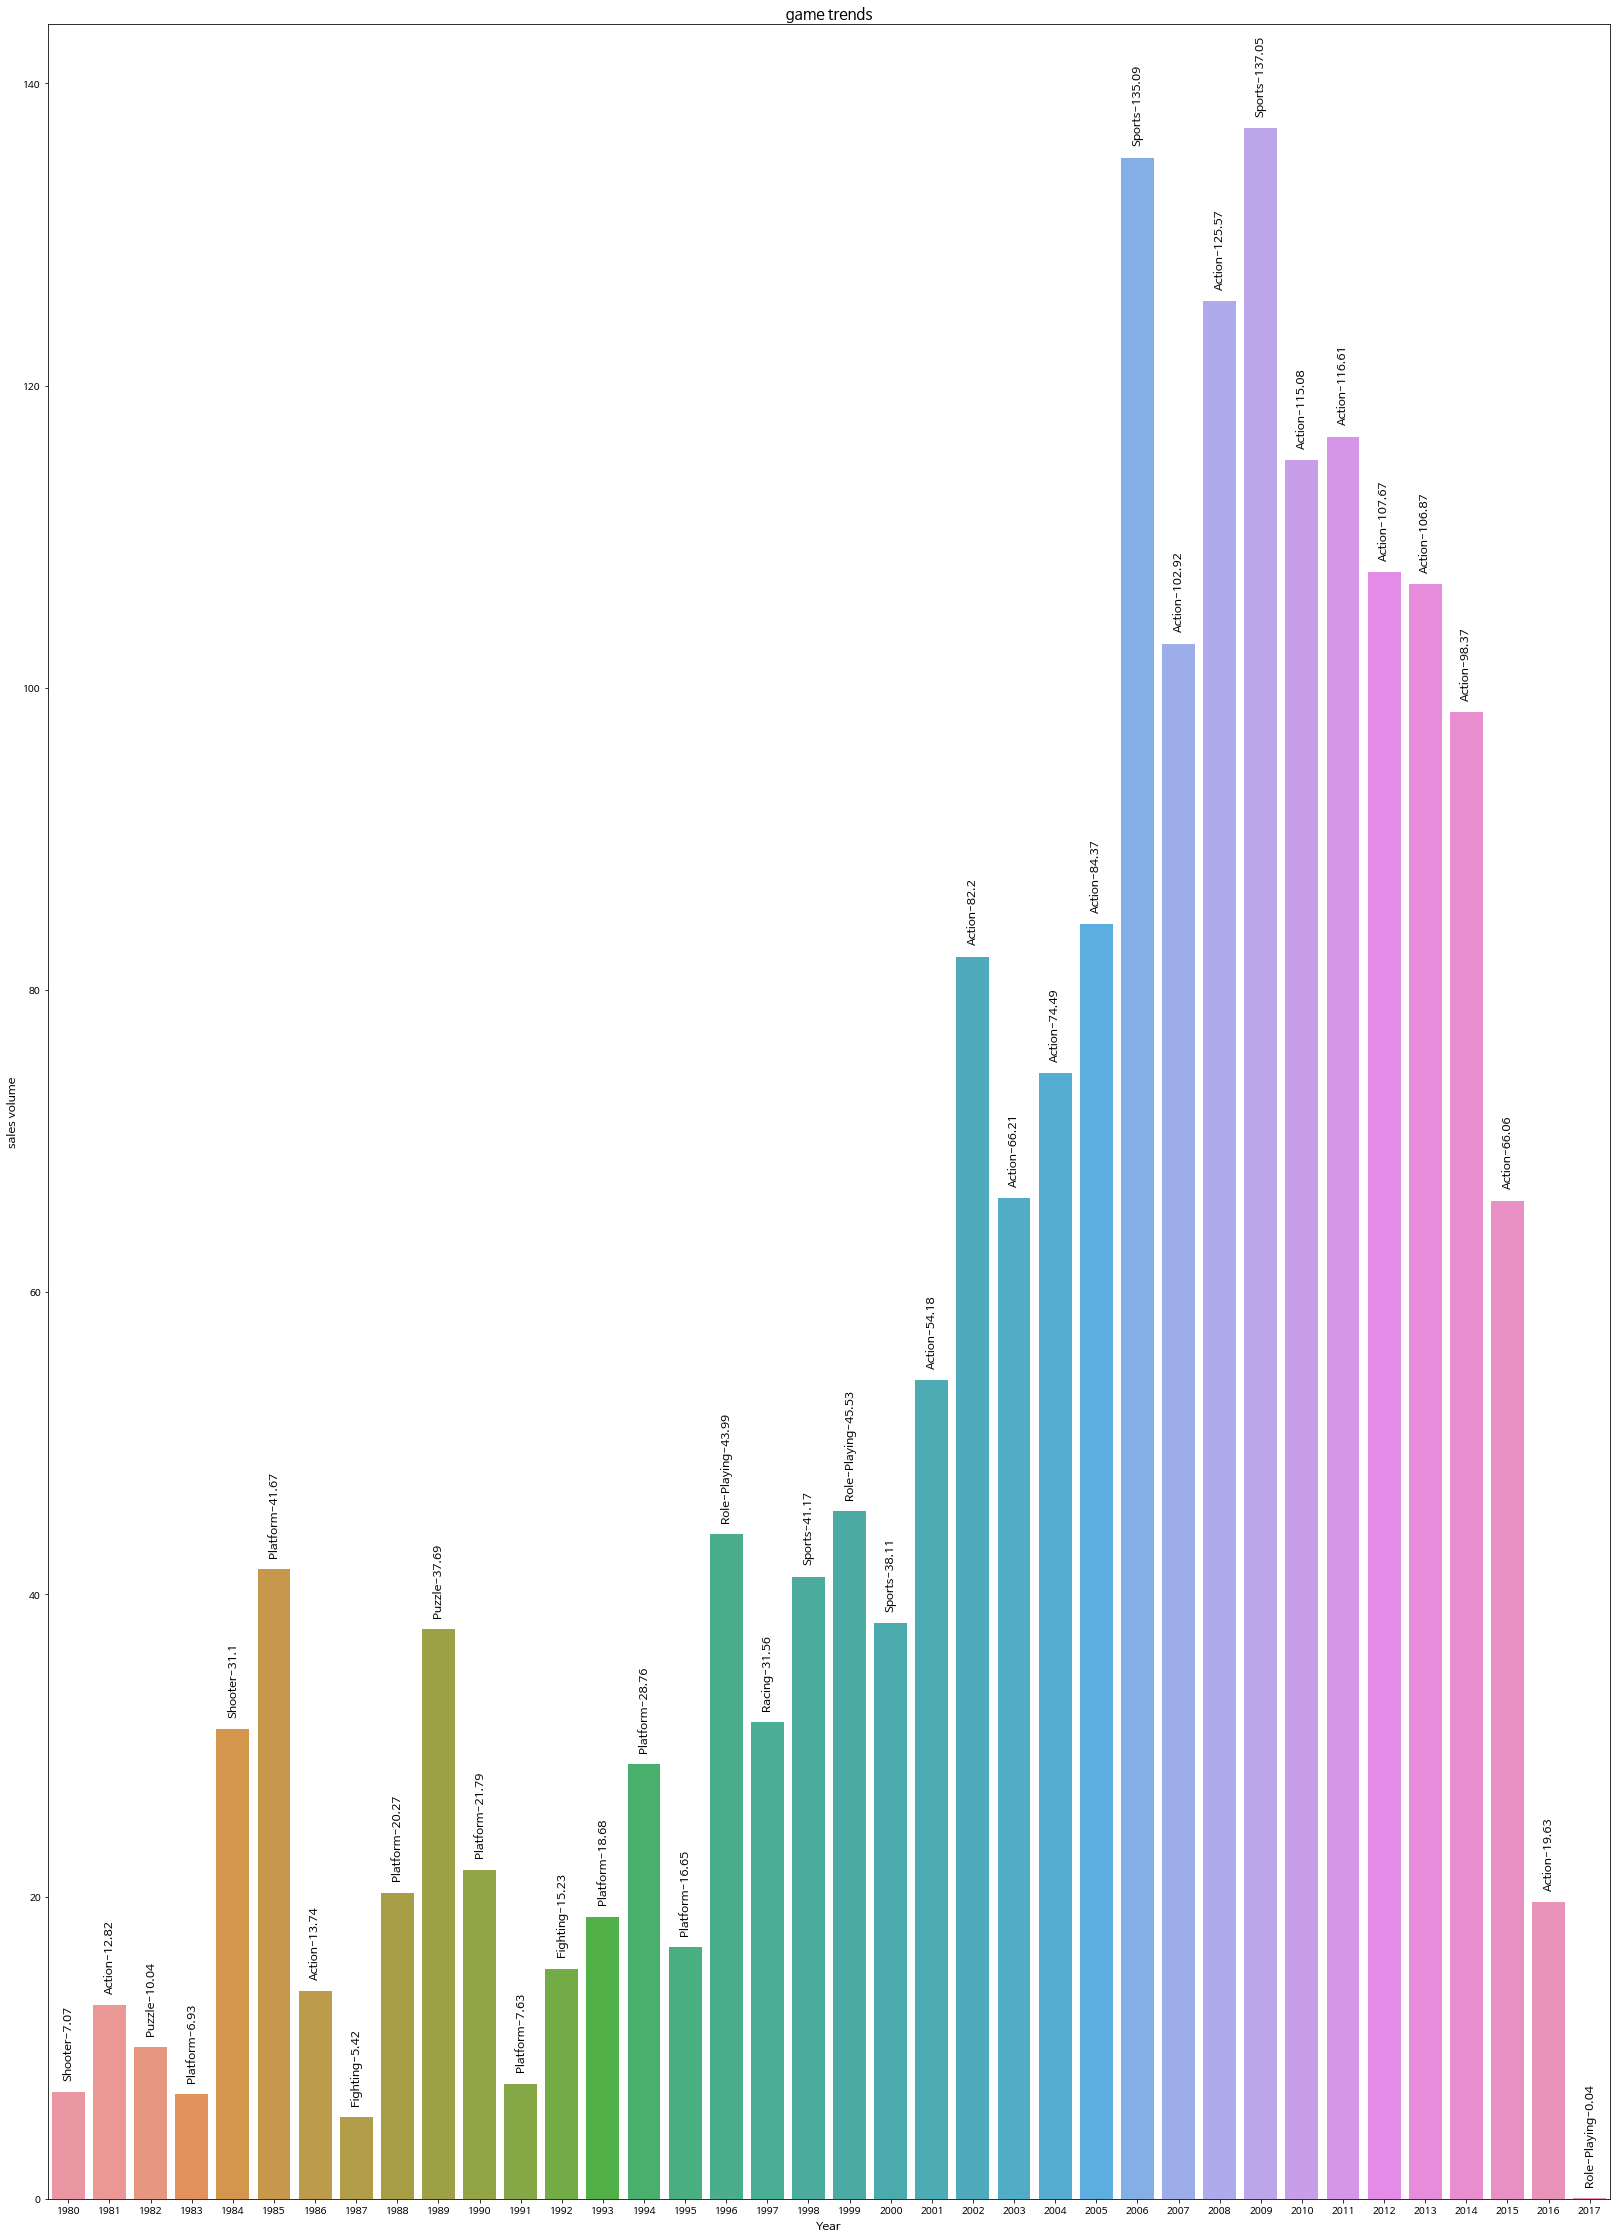

In [ ]:
#연도에 따른 게임 트렌드 파악2
year_sales = df.groupby(by=['Year', 'Genre'])['Sales'].sum().reset_index()
year_sale = year_sales.groupby(by=['Year'])['Sales'].transform(max) == year_sales['Sales']
year_sale_max = year_sales[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']

plt.figure(figsize=(28, 40))
ax = sns.barplot(x='Year', y='Sales', data=year_sale_max)
index = 0
for value in year_sale_max['Sales']:
    ax.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='black', size=12, rotation= 90, ha="center")
    index += 1

plt.title("game trends", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("sales volume", fontsize=12)

plt.show()

*위의 line 그래프보다 연도별 장르 트렌드 변화를 뚜렷하게 확인할 수 있다.*

* 1980 - 1984 : 'Shooter'장르가 트렌드

* 1985 - 1995 : 'Platform'장르가 트렌드

* 1996 - 2000 : 'Role-Playing'장르가 트렌드

* 2001 - 2005 : 'Action' 장르가 트렌드

* 2006 - 2010: 'Sports' 장르가 트렌드, 'Action'장르도 여전히 인기

* 2011 - 2020: 'Action' 장르가 다시 트렌트 

**3.2.2 시간에 따른 출고량의 변화**

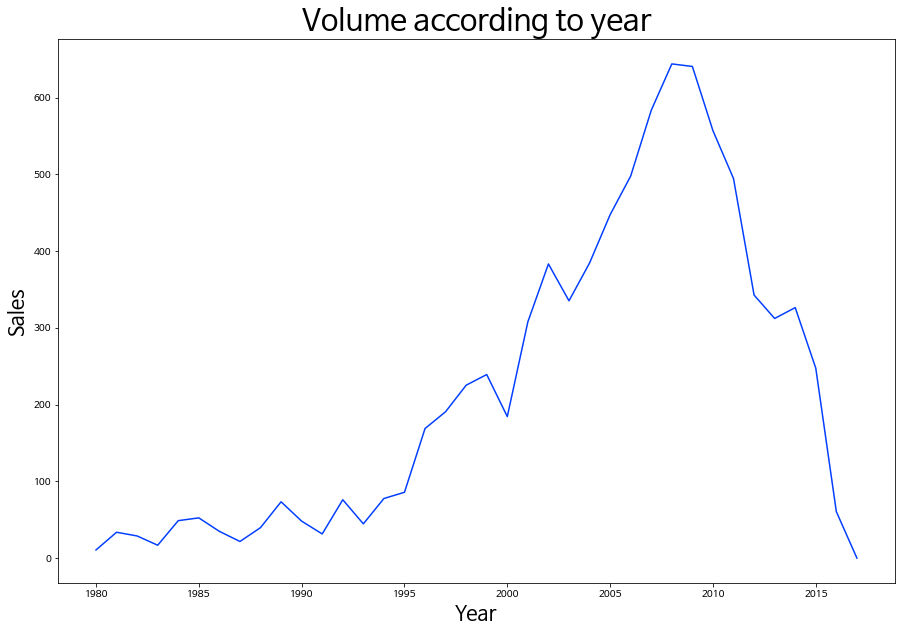

In [ ]:
#시간에 따른 출고량의 변화 시각화
year = df.groupby('Year').sum()
year = year[['Sales']]
year = year.reset_index()
year
plt.figure(figsize=(15, 10))
plt.title("Volume according to year", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Sales", fontsize=20)
sns.lineplot(x='Year', y='Sales', data=year)

***위 그래프와 같이 2005-2010년도 사이의 출고량이 가장 많았다.***

**3.3 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

**3.3.1 Platform 별 출고량**

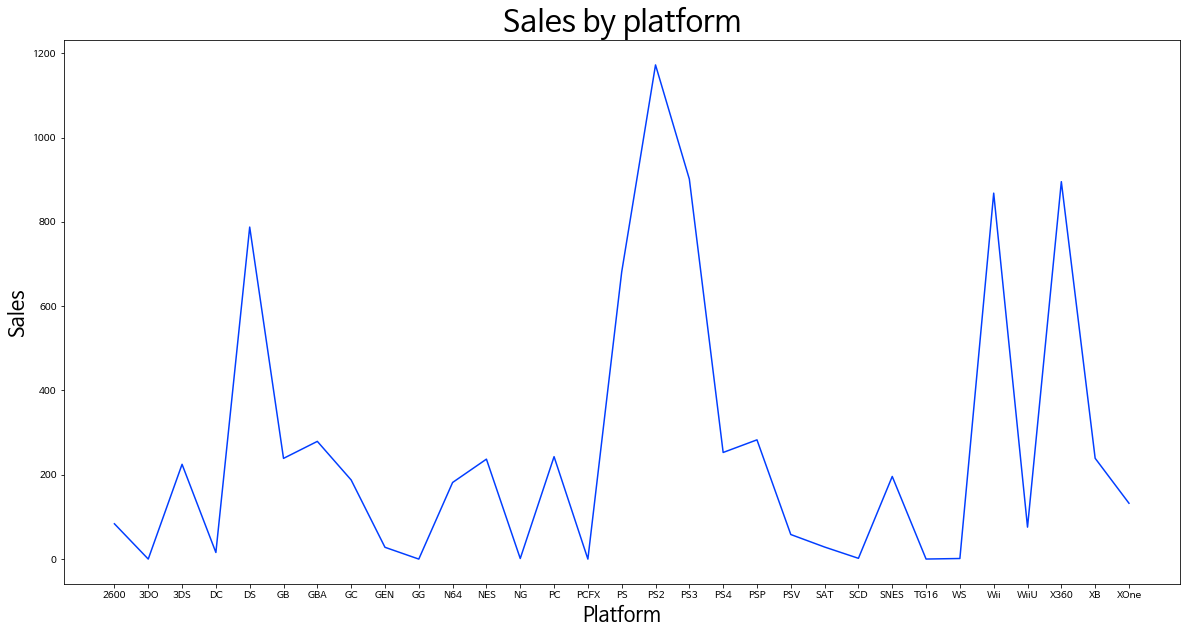

In [ ]:
#platform 별 출고량
platform = df.groupby('Platform').sum()
platform = platform[['Sales']]
platform = platform.reset_index()
platform
plt.figure(figsize=(20, 10))
plt.title("Sales by platform", fontsize=30)
plt.xlabel("Platform", fontsize=20)
plt.ylabel("Sales", fontsize=20)
sns.lineplot(x='Platform', y='Sales', data=platform)

***platform별 출고량을 보면 PS2가 가장 높은 출고량을 보여주고 있다.***

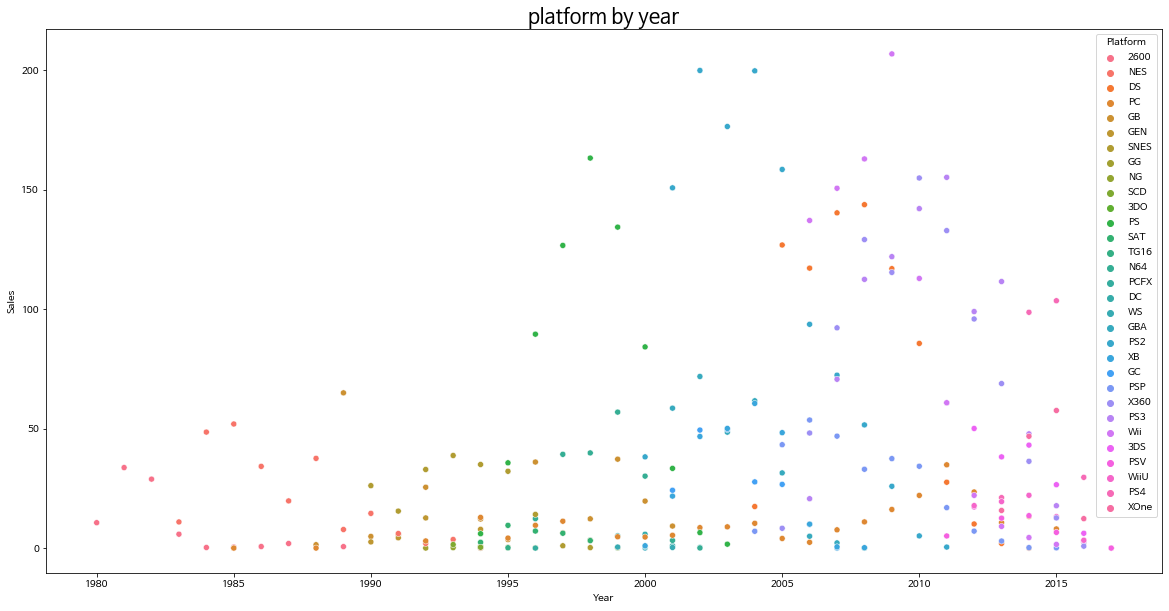

In [ ]:
# 시간에 따른 플랫폼 트랜드

year_platform = df.groupby(['Year', 'Platform'])['Sales'].sum()
year_platform = year_platform.reset_index()

plt.figure(figsize=(20, 10))
plt.title('platform by year', fontsize=20)
sns.scatterplot(x="Year", y="Sales", hue="Platform", data = year_platform)

***시간에 따른 플랫폼별 트렌드 변화가 있다.***

* 1980 - 1989 : 'NES' 플랫폼이 트렌드

* 1990 - 1999 : 'PS' 플랫폼이 트렌드

* 2000 - 2004 : 'PS2'가 출시되면서 트렌드의 변화

* 2005 - 2010 : 'DS'와 'Wii' 플랫폼이 출시되면서 트렌드의 변화

* 2010 - 2014 : 'PS3' 플랫폼과 'X360' 플랫폼이 트렌드

* 2015 - 2020 : 'PS4' 플랫폼이 트렌드

**3.3.2 최근 10년 출고량 TOP10 게임**

In [ ]:
#최근 10년 출고량 TOP10 게임
year_top_game = df[df['Year'] >= 2011].sort_values('Sales', ascending=False).head(10)
year_top_game = year_top_game.reset_index(drop=True)
year_top_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
3,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
4,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
5,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
6,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21
7,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
8,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
9,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79


***가장 출고량이 높은 게임은 Grand Theft Auto V, Call of Duty : Modern Warfare 3 순***

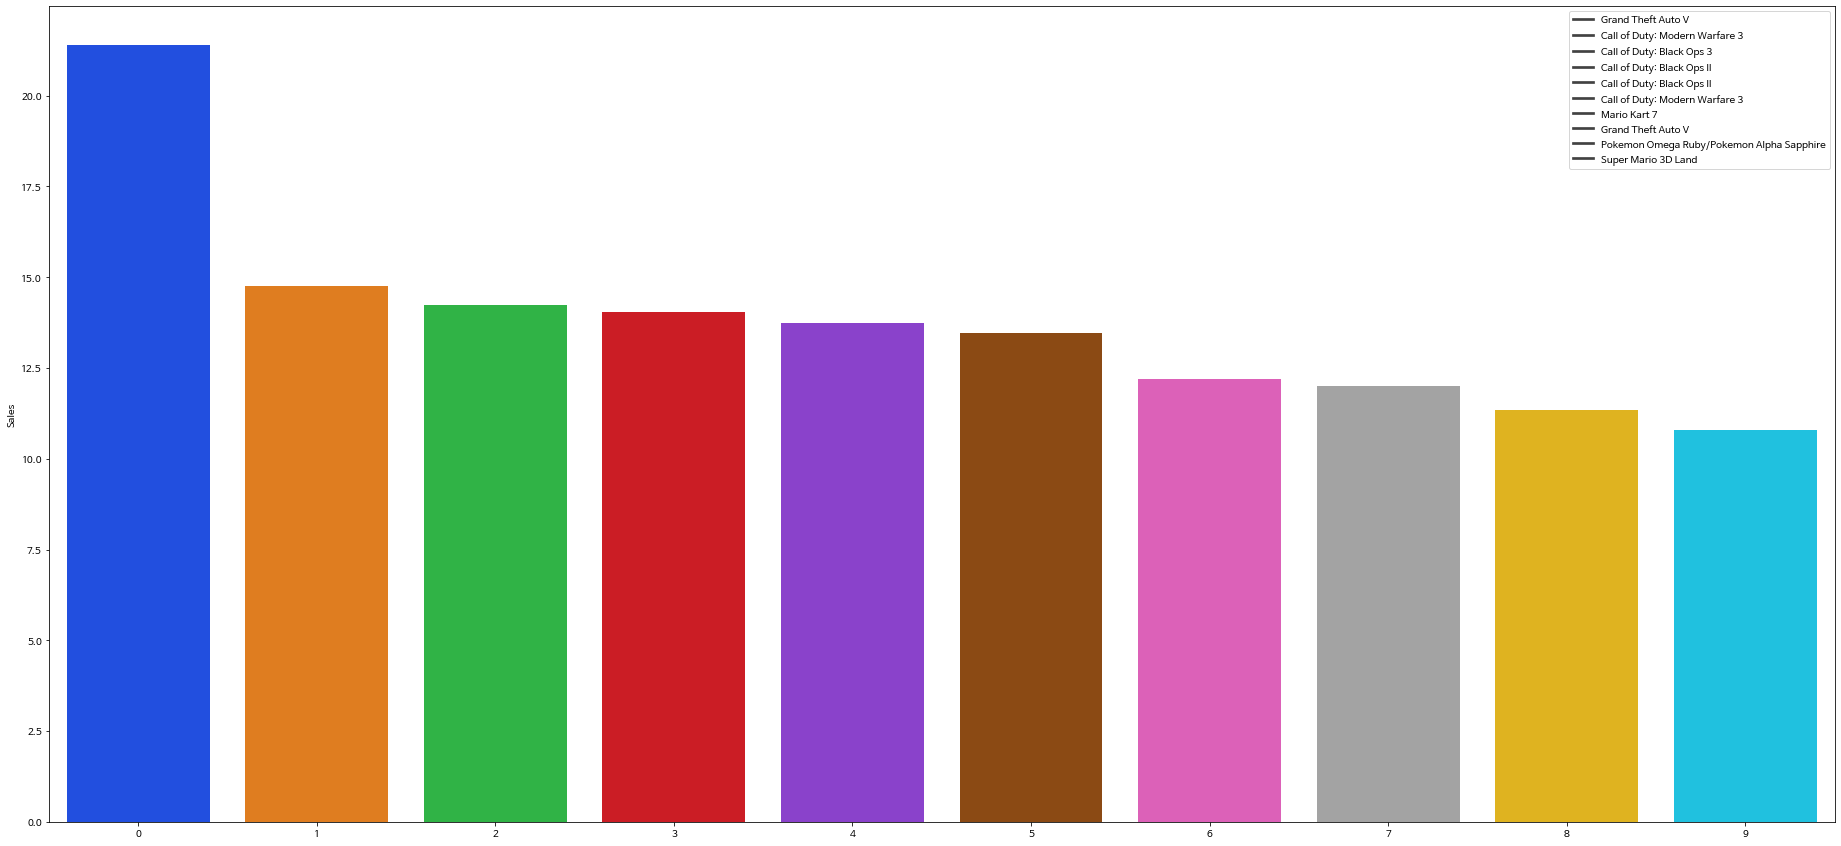

In [ ]:
#최근 10년 출고량 TOP10 게임 시각화
plt.figure(figsize=(32, 15))
sns.barplot(x = year_top_game.index, y='Sales', data = year_top_game)
plt.legend(year_top_game['Name'])
plt.show()

***최근 10년간의 게임 장르와 플랫폼의 트렌드를 보면 장르는 'Action'가 트렌드이고 플랫폼은 'PS3', 'PS4'이 트렌드이다.***

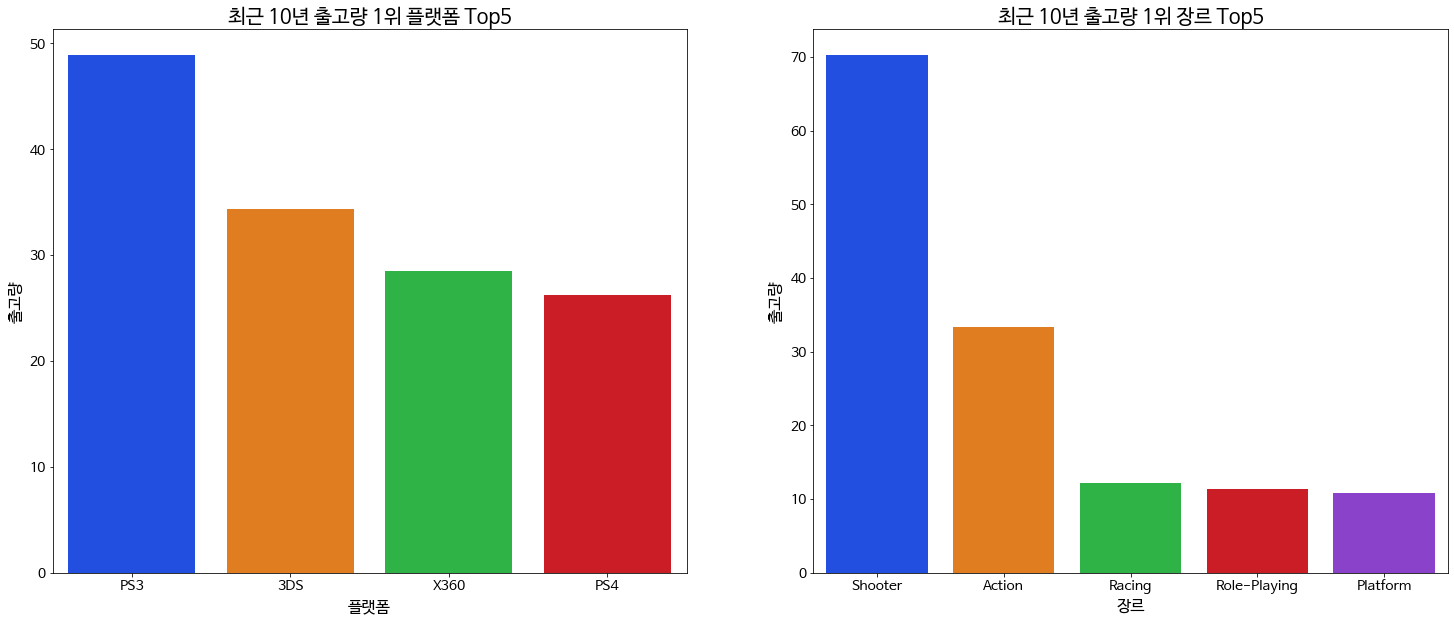

In [ ]:
#최근 10년 플랫폼, 장르 판매량 시각화
def recent_year_Top5_sales(df, col, sales):
    return df.groupby(col)[sales].sum().reset_index(name='sales').sort_values('sales', ascending=False).head(5)

# 최근 10년 플랫폼 판매량 Top5
platform_sales_top5 = recent_year_Top5_sales(year_top_game, 'Platform', 'Sales')
# 최근 10년 장르 판매량 Top5
genre_sales_top5 = recent_year_Top5_sales(year_top_game, 'Genre', 'Sales')

data_list = [platform_sales_top5, genre_sales_top5]
titles = ['최근 10년 출고량 1위 플랫폼 Top5', '최근 10년 출고량 1위 장르 Top5']
x_labels = ['플랫폼', '장르']

fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=2)
for i, data, title in zip(range(5), data_list, titles):
    sns.barplot(x=data.iloc[:,0], y=data.iloc[:,1], ax=axs[i])
    axs[i].set_title(titles[i], fontsize=20)
    axs[i].tick_params(labelsize=14)
    axs[i].set_xlabel(x_labels[i], fontsize=16)
    axs[i].set_ylabel('출고량', fontsize=16)
plt.show()

*최근 출고량 플랫폼 1위는 'PS'이고, 장르는 'Shooter'이다.*

***'PS' 플랫폼을 사용하여 'Shooter', 'Action' 장르의 게임을 선호하는 것으로 판단***

# **결론**
### **다음 분기에 어떤 게임을 설계해야 할까?**

* **NA : 'NES'플랫폼을 활용한 'shooter'장르의 게임**

* **EU : 'DS'플랫폼을 활용한 'Action'장르의 게임**

* **JP : 'NES'와 'DS'플랫폼을 활용한 'Role-Palying'장르의 게임**

* **OT : 'PS'플랫폼을 활용한 'Shooter'장르의 게임**